In [44]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, cohen_kappa_score

In [27]:
# Ler o arquivo CSV com as colunas na primeira linha
data = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [28]:
data = data.drop('gender', axis=1)
data = data.drop('smoking_history', axis=1)

In [29]:
# Separar as características (features) e a classe (label)
X = data.iloc[:, :-1].values  # Todas as colunas exceto a última
y = data.iloc[:, -1].values   # Última coluna

In [30]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Construir o modelo Deep MLP
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [33]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50




2500/2500 [==============================] - 11s 4ms/step - loss: 0.1160 - accuracy: 0.9599 - val_loss: 0.0908 - val_accuracy: 0.9686
Epoch 2/50
2500/2500 [==============================] - 17s 7ms/step - loss: 0.0916 - accuracy: 0.9688 - val_loss: 0.0860 - val_accuracy: 0.9707
Epoch 3/50
2500/2500 [==============================] - 15s 6ms/step - loss: 0.0883 - accuracy: 0.9697 - val_loss: 0.0857 - val_accuracy: 0.9711
Epoch 4/50
2500/2500 [==============================] - 15s 6ms/step - loss: 0.0873 - accuracy: 0.9700 - val_loss: 0.0839 - val_accuracy: 0.9716
Epoch 5/50
2500/2500 [==============================] - 14s 6ms/step - loss: 0.0860 - accuracy: 0.9706 - val_loss: 0.0825 - val_accuracy: 0.9721
Epoch 6/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0857 - accuracy: 0.9707 - val_loss: 0.0824 - val_accuracy: 0.9718
Epoch 7/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0852 - accuracy: 0.9709 - val_loss: 0.0821 - val_accuracy: 0.97

In [35]:
# Fazer previsões
predictions = model.predict(X_test).round()

625/625 [==============================] - 2s 2ms/step


In [36]:
# Avaliação do modelo
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Accuracy: 0.9722


In [37]:
# Matriz de confusão e Índice Kappa
conf_matrix = confusion_matrix(y_test, predictions)
kappa_score = cohen_kappa_score(y_test, predictions)

In [38]:
print("Matriz de Confusão:")
print(conf_matrix)
print("Índice Kappa:", kappa_score)

Matriz de Confusão:
[[18284     8]
 [  548  1160]]
Índice Kappa: 0.7922664536924563


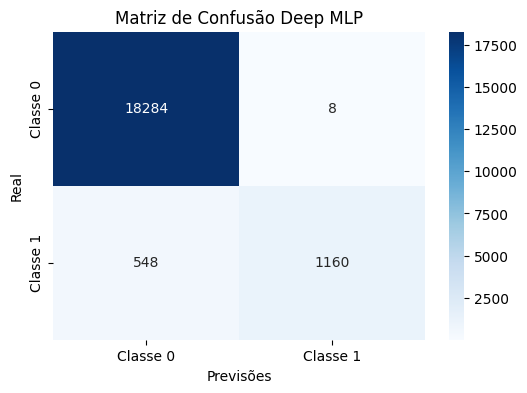

In [46]:
# Criar um plot da matriz de confusão usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão Deep MLP')
plt.show()